In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [3]:
df = pd.read_csv('archive-2/diabetes_012_health_indicators_BRFSS2015.csv')
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


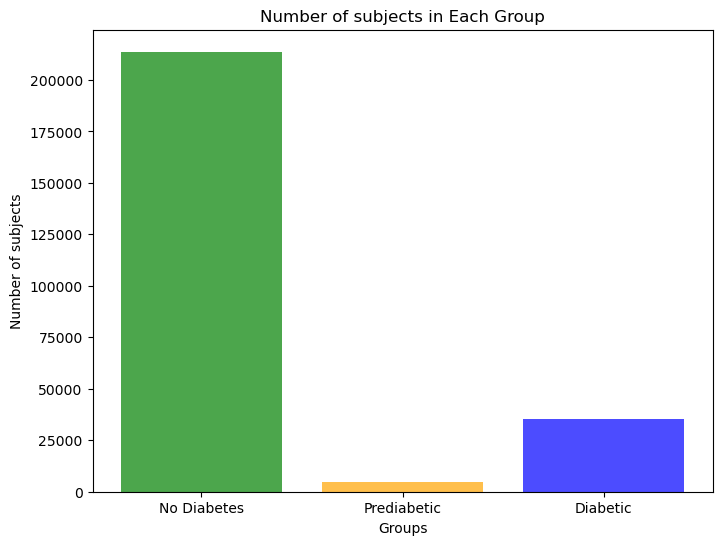

In [5]:
no_diabetes = df[df['Diabetes_012'] == 0]
pre_diabetes = df[df['Diabetes_012'] == 1]
diabetes = df[df['Diabetes_012'] == 2]

# Count the number of rows in each dataframe
counts = [len(no_diabetes), len(pre_diabetes), len(diabetes)]
labels = ['No Diabetes', 'Prediabetic', 'Diabetic']

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['green', 'orange', 'blue'], alpha=0.7)
plt.xlabel('Groups')
plt.ylabel('Number of subjects')
plt.title('Number of subjects in Each Group')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Assuming your dataset is in a pandas DataFrame `df`
# `X` represents the features and `y` represents the target
columns_to_drop = ['Diabetes_012']
X = df.drop(columns=columns_to_drop, axis=1)
y = df['Diabetes_012']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train_scaled, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test_scaled)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))


Accuracy: 0.8482734153263954
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     42795
         1.0       0.00      0.00      0.00       944
         2.0       0.54      0.18      0.27      6997

    accuracy                           0.85     50736
   macro avg       0.47      0.39      0.40     50736
weighted avg       0.80      0.85      0.81     50736



/Users/shuuei/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shuuei/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shuuei/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


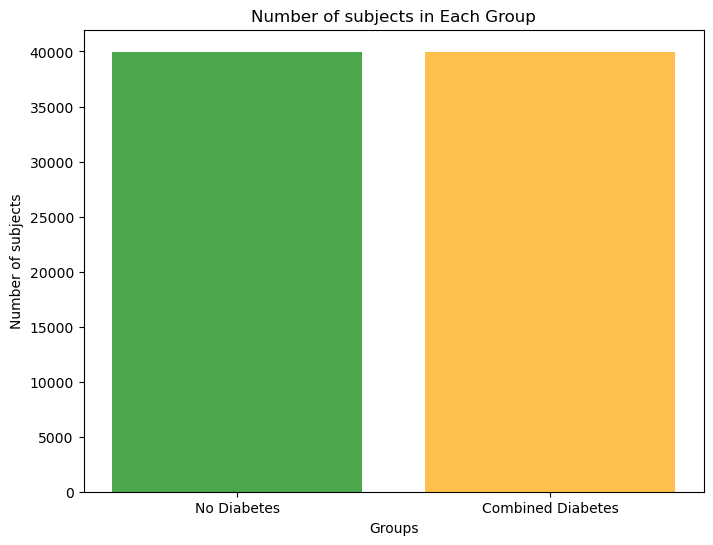

In [46]:
combined_diabetes = pd.concat([pre_diabetes, diabetes])
combined_diabetes['Diabetes_012'] = 2.0
matched_no_diabetes = no_diabetes.sample(n=len(combined_diabetes), random_state=42)

# Count the number of rows in each dataframe
counts = [len(combined_diabetes), len(matched_no_diabetes)]
labels = ['No Diabetes', 'Combined Diabetes']

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['green', 'orange'], alpha=0.7)
plt.xlabel('Groups')
plt.ylabel('Number of subjects')
plt.title('Number of subjects in Each Group')
plt.show()

In [47]:
df_resampled = pd.concat([combined_diabetes, matched_no_diabetes])
df_resampled

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
64,2.0,1.0,1.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,4.0,30.0,30.0,1.0,0.0,10.0,4.0,3.0
81,2.0,1.0,1.0,1.0,33.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,3.0,0.0,0.0,1.0,7.0,4.0,7.0
193,2.0,1.0,1.0,1.0,34.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,7.0,4.0,8.0
236,2.0,1.0,1.0,1.0,33.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,12.0,6.0,6.0
275,2.0,1.0,1.0,1.0,32.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,1.0,8.0,5.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217332,0.0,0.0,1.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,10.0,10.0,0.0,1.0,5.0,4.0,8.0
187296,0.0,0.0,1.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,2.0,15.0,4.0,0.0,0.0,1.0,6.0,4.0
8800,0.0,0.0,1.0,1.0,22.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,15.0,0.0,0.0,8.0,6.0,8.0
36139,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,6.0,8.0


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Assuming your dataset is in a pandas DataFrame `df`
# `X` represents the features and `y` represents the target
columns_to_drop = ['Diabetes_012', 'Smoker', 'Fruits', 'PhysActivity', 'Veggies', 'AnyHealthcare', 'Stroke']
X = df_resampled.drop(columns=columns_to_drop, axis=1)
y = df_resampled['Diabetes_012']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train_scaled, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test_scaled)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))


Accuracy: 0.7416046526170971
              precision    recall  f1-score   support

         0.0       0.75      0.72      0.74      7964
         2.0       0.73      0.76      0.75      8027

    accuracy                           0.74     15991
   macro avg       0.74      0.74      0.74     15991
weighted avg       0.74      0.74      0.74     15991



In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load your dataset
columns_to_drop = ['Diabetes_012']
X = df_resampled.drop(columns=columns_to_drop, axis=1)
y = df_resampled['Diabetes_012']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model (optional step)
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

importances = model.feature_importances_
# Feature Importance from Random Forest
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)
print(feature_importance)


Accuracy: 0.7349759239572259
                 feature  importance
3                    BMI    0.173892
18                   Age    0.126513
13               GenHlth    0.102512
20                Income    0.085332
0                 HighBP    0.071620
15              PhysHlth    0.068450
19             Education    0.057937
14              MentHlth    0.054202
1               HighChol    0.041236
8                 Fruits    0.029165
4                 Smoker    0.028447
17                   Sex    0.026498
16              DiffWalk    0.024798
7           PhysActivity    0.023708
9                Veggies    0.022530
6   HeartDiseaseorAttack    0.017353
12           NoDocbcCost    0.012505
5                 Stroke    0.010342
10     HvyAlcoholConsump    0.009294
11         AnyHealthcare    0.007601
2              CholCheck    0.006065


In [93]:
healthy_data = df_resampled[df_resampled['Diabetes_012'] == 0]
healthy_data

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
162288,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,15.0,1.0,0.0,9.0,5.0,5.0
227646,0.0,1.0,0.0,1.0,32.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,8.0,6.0,8.0
888,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,1.0,0.0,0.0,0.0,9.0,6.0,6.0
230094,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
134829,0.0,0.0,0.0,1.0,35.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,10.0,2.0,0.0,0.0,6.0,4.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217332,0.0,0.0,1.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,10.0,10.0,0.0,1.0,5.0,4.0,8.0
187296,0.0,0.0,1.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,2.0,15.0,4.0,0.0,0.0,1.0,6.0,4.0
8800,0.0,0.0,1.0,1.0,22.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,15.0,0.0,0.0,8.0,6.0,8.0
36139,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,6.0,8.0


/Users/shuuei/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shuuei/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


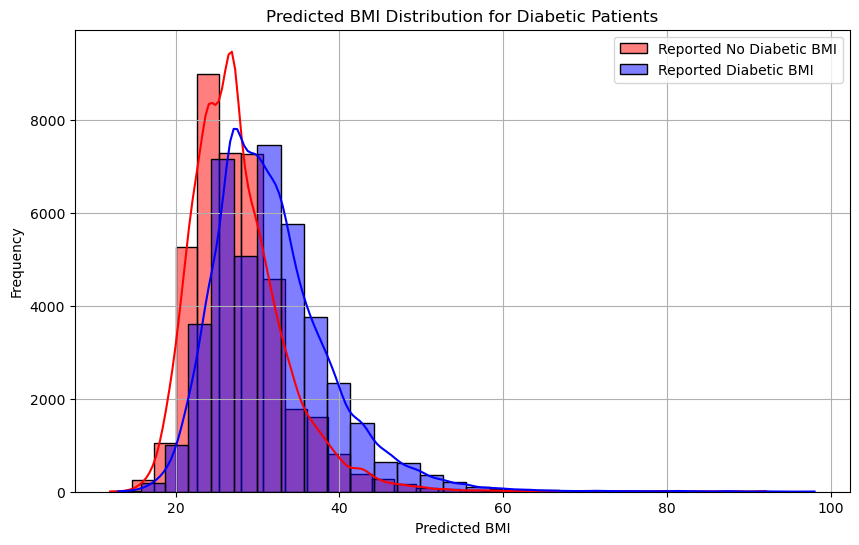

In [94]:
diabetic_reported = combined_diabetes['BMI']
no_diabetic_reported = healthy_data['BMI']

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming predicted_bmi_diabetic contains the predicted BMI values for diabetic patients

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot a histogram with KDE for predicted diabetic BMI
sns.histplot(no_diabetic_reported, color='red', kde=True, bins=30, label='Reported No Diabetic BMI')
sns.histplot(diabetic_reported, color='blue', kde=True, bins=30, label='Reported Diabetic BMI')

# Customize the plot
plt.title("Predicted BMI Distribution for Diabetic Patients")
plt.xlabel("Predicted BMI")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [116]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

columns_to_drop = ['Diabetes_012', 'BMI', 'CholCheck', 'AnyHealthcare', 'HvyAlcoholConsump', 'Stroke']
X = healthy_data.drop(columns=columns_to_drop, axis=1)
y = healthy_data['BMI']

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Train the model
model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)
val_predictions = model.predict(X_val_scaled)

mean_squared_error(y_val, val_predictions)

37.1335981760513

/Users/shuuei/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shuuei/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


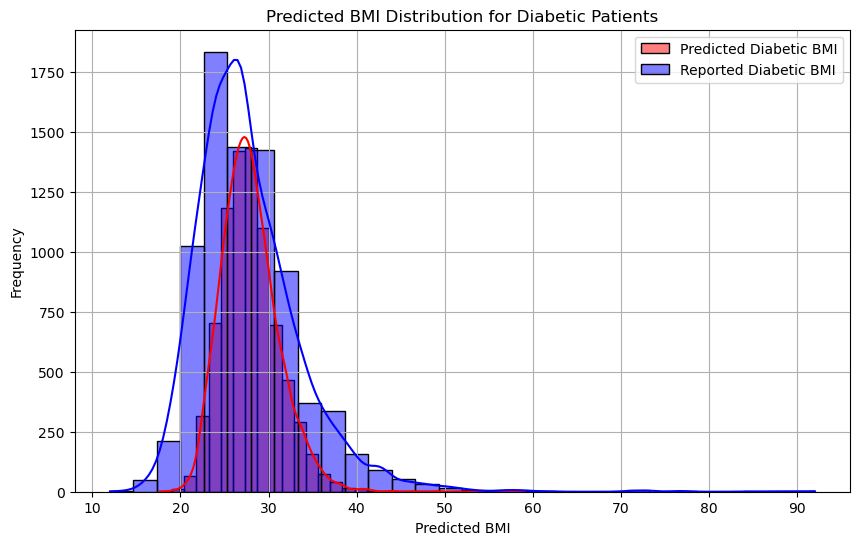

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming predicted_bmi_diabetic contains the predicted BMI values for diabetic patients

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot a histogram with KDE for predicted diabetic BMI
sns.histplot(val_predictions, color='red', kde=True, bins=30, label='Predicted Diabetic BMI')
sns.histplot(y_val, color='blue', kde=True, bins=30, label='Reported Diabetic BMI')

# Customize the plot
plt.title("Predicted BMI Distribution for Diabetic Patients")
plt.xlabel("Predicted BMI")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [118]:
columns_to_drop = ['Diabetes_012', 'BMI', 'CholCheck', 'AnyHealthcare', 'HvyAlcoholConsump', 'Stroke']
diabetic_test = combined_diabetes.drop(columns=columns_to_drop, axis=1)

diabetic_pred = model.predict(diabetic_test)
diabetic_pred

/Users/shuuei/miniconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([24.08      , 26.88166667, 24.38      , ..., 23.88      ,
       23.8       , 24.38      ])

/Users/shuuei/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shuuei/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


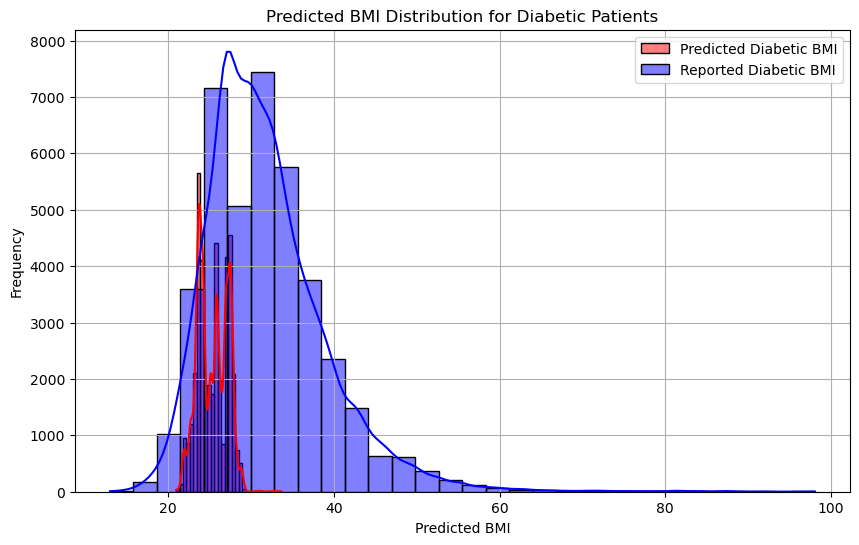

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming predicted_bmi_diabetic contains the predicted BMI values for diabetic patients

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot a histogram with KDE for predicted diabetic BMI
sns.histplot(diabetic_pred, color='red', kde=True, bins=30, label='Predicted Diabetic BMI')
sns.histplot(diabetic_reported, color='blue', kde=True, bins=30, label='Reported Diabetic BMI')

# Customize the plot
plt.title("Predicted BMI Distribution for Diabetic Patients")
plt.xlabel("Predicted BMI")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [120]:
res = pd.DataFrame({
  'reported BMI': diabetic_reported,
  "suggested BMI": diabetic_pred
})
res

,reported BMI,suggested BMI
64,27.0,24.080000
81,33.0,26.881667
193,34.0,24.380000
236,33.0,23.640000
275,32.0,27.840000
...,...,...
253659,37.0,24.060000
253668,29.0,26.866000
253670,25.0,23.880000
253676,18.0,23.800000


In [122]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

columns_to_drop = ['Diabetes_012', 'GenHlth', 'CholCheck', 'AnyHealthcare', 'HvyAlcoholConsump', 'Stroke']
X = healthy_data.drop(columns=columns_to_drop, axis=1)
y = healthy_data['GenHlth']

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Train the model
model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)
val_predictions = model.predict(X_val_scaled)


In [123]:
mean_squared_error(y_val, val_predictions)

0.8901950975487744

In [124]:
columns_to_drop = ['Diabetes_012', 'BMI', 'CholCheck', 'AnyHealthcare', 'HvyAlcoholConsump', 'Stroke']
diabetic_test = combined_diabetes.drop(columns=columns_to_drop, axis=1)

diabetic_pred = model.predict(diabetic_test)
diabetic_pred

/Users/shuuei/miniconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([4., 3., 3., ..., 2., 3., 3.])

/Users/shuuei/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shuuei/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


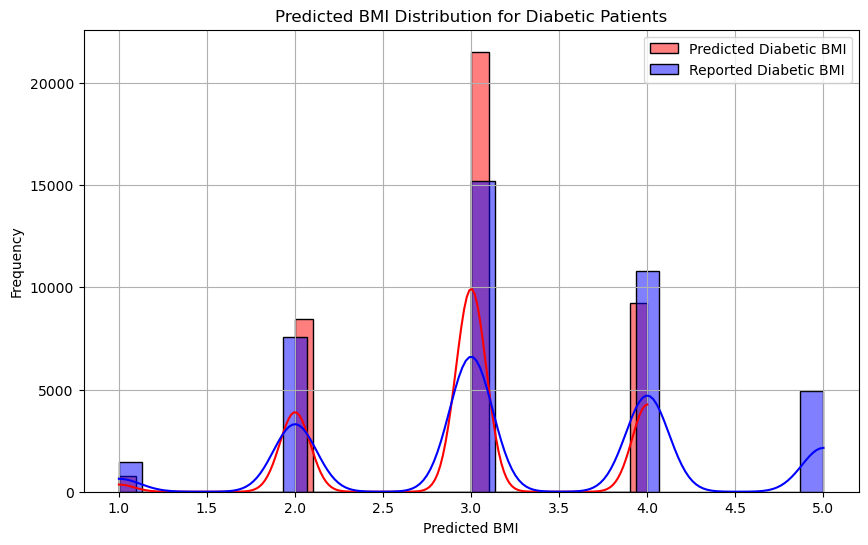

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming predicted_bmi_diabetic contains the predicted BMI values for diabetic patients

# Create a figure and axis
plt.figure(figsize=(10, 6))
diabetic_reported = combined_diabetes['GenHlth']

# Plot a histogram with KDE for predicted diabetic BMI
sns.histplot(diabetic_pred, color='red', kde=True, bins=30, label='Predicted Diabetic BMI')
sns.histplot(diabetic_reported, color='blue', kde=True, bins=30, label='Reported Diabetic BMI')

# Customize the plot
plt.title("Predicted BMI Distribution for Diabetic Patients")
plt.xlabel("Predicted BMI")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [126]:
res = pd.DataFrame({
  'reported BMI': diabetic_reported,
  "suggested BMI": diabetic_pred
})
res

,reported BMI,suggested BMI
64,4.0,4.0
81,3.0,3.0
193,2.0,3.0
236,5.0,4.0
275,5.0,2.0
...,...,...
253659,4.0,3.0
253668,2.0,2.0
253670,5.0,2.0
253676,4.0,3.0
